<a href="https://colab.research.google.com/github/T-Sawao/diveintocode-ml3/blob/main/term2_sprint15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.このSprintについて

**Sprintの目的**  
機械学習分野の論文から有益な情報を引き出せるようにする
これまで扱ってきた領域の論文から新たな知識を得る

どのように学ぶか
ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。


.論文読解

以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。


[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99  
https://arxiv.org/pdf/1506.01497.pdf


## 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

**条件**  
- 答える際は論文のどの部分からそれが分かるかを書く。
- 必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
- 論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。






### (1) 物体検出の分野にはどういった手法が存在したか。

要約-最先端のオブジェクト検出ネットワークは、オブジェクトの場所を仮定するために地域提案アルゴリズムに依存しています。 SPPnet [1]やFastR-CNN [2]のような進歩により、これらの検出ネットワークの実行時間が短縮され、領域提案の計算がボトルネックになっています。

Abstract—State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations. Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. In this work, we introduce a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals.

### (2) Fasterとあるが、どういった仕組みで高速化したのか。

画像ピラミッドを無くし、ピラミッドをフィルタリングして、複数のスケールの領域を予測することで、実行時間を大幅に節約した。

As discussed, our solution does not need an image pyramid or filter pyramid to predict regions of multiple scales, saving considerable running time. 

### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

OverFeat  
https://arxiv.org/abs/1312.6229v4

one-stageの手法としては、畳み込み特徴マップ上でウインドウをスライドさせながら、
回帰分析と分類を使用する検出方法を行うOverFeatを使用。OverFeatはクラス固有の検出パイプラインで、そこにクラスにとらわれない提案を含めたのがtwo-stageです。


The OverFeat paper [9] proposes a detection method that uses regressors and classifiers on sliding windows over convolutional feature maps.
OverFeat is a one-stage, class-specific detection pipeline, and ours is a two-stage cascade consisting of class-agnostic proposals and class-specific detections. 



### (4) RPNとは何か。

RPNモジュールは、この統合ネットワークの重要な役割をもっている。 

具体的には、入力として（任意のサイズの）画像を取得し、それぞれがオブジェクトネススコアを持つ長方形のオブジェクトプロポーザルのセットを出力します。

The RPN module serves as the ‘attention’ of this unified network.

A Region Proposal Network (RPN) takes an image (of any size) as input and outputs a set of rectangular object proposals, each with an objectness score

RPNの説明資料  
https://medium.com/egen/region-proposal-network-rpn-backbone-of-faster-r-cnn-4a744a38d7f9

###  (5) RoIプーリングとは何か。

SPP-netを使用して、全体から特徴マップを計算します画像を1回だけ作成し、任意の領域（サブ画像）に特徴をプールして、トレーニング用の固定長の表現を生成する検出器です。この方法により、畳み込み特徴を繰り返し計算することを回避します。

参考論文  
Spatial Pyramid Pooling in Deep Convolutional
Networks for Visual Recognition  
https://arxiv.org/abs/1406.4729


上記論文から下記内容を参考  
Using SPP-net, we compute the feature maps from the entire image only once, and then pool features in arbitrary regions (sub-images) to generate fixed-length representations for training the detectors. This method avoids repeatedly computing the convolutional features. 

Rol poolingの説明資料  
https://qiita.com/yu4u/items/5cbe9db166a5d72f9eb8

### (6) Anchorのサイズはどうするのが適切か。

3つのスケールと3つのアスペクト比を比較したところ、各位置でアンカーを1つだけ使用する場合はmAP3〜4％のかなりのマージンが低下し、3つのスケールを使用する場合は高くなります。そのため回帰分析においては、複数のサイズのアンカーを使用することが効果的なソリューションです

3 scales and 3 aspect ratios (69.9% mAP in Table 8).
If using just one anchor at each position, the mAP
drops by a considerable margin of 3-4%. The mAP
is higher if using 3 scales (with 1 aspect ratio) or 3
aspect ratios (with 1 scale), demonstrating that using
anchors of multiple sizes as the regression references
is an effective solution. 

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

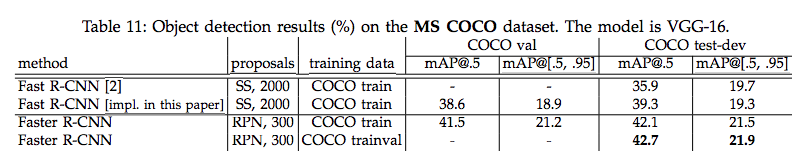

上記グラフが示すとおり、Fast R-CNN(mAP@5 38.6)と比較して、Faster R-CNN(mAP@5 41.5)と優れている。

### (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

### 自動要約機


https://text-summary.userlocal.jp/

で見せます対処するためのこのスキームの効果を実験する複数のスケールとサイズ（表8）。 
分類損失 Lcls は、2つのクラスにわたるログ損失です。 
検出ネットワークには採用高速 R - CNN [2]。 
私たちは技術を開発する必要があります間で畳み込み層を共有することができます2つの別々のネットワークを学習するのではなく、2つのネットワーク-動作します。 
ネットワークをトレーニングするための3つの方法について説明します機能を共有：（ i ）交互のトレーニング。 
共有層後方伝搬信号 RPN 損失と高速 R - CNN 損失の両方から結合されます。 
ソルバーはに含まれていますリリースされたPython コード。 
FastR - CNN による検出ネットワークステップ1 RPN によって生成されます。 
検出ネット-作業もImageNet によって初期化されます-事前トレーニング済みモデル。 
そのような予測は不可能ではありません—それでも真ん中だけの場合、オブジェクトの範囲を大まかに推測しますオブジェクトのが表示されます。
          

IMAKITA Document Squeezer  
https://report.hot-cafe.net/imakita-document-squeezer-7125


検出ネットワークには採用高速 R - CNN [2]。
 私たちは技術を開発する必要があります間で畳み込み層を共有することができます2つの別々のネットワークを学習するのではなく、2つのネットワーク-動作します。
 ネットワークをトレーニングするための3つの方法について説明します機能を共有：（ i ）交互のトレーニング。
 共有層後方伝搬信号 RPN 損失と高速 R - CNN 損失の両方から結合されます。
 FastR - CNN による検出ネットワークステップ1 RPN によって生成されます。

###  資料

### 分野の系譜などわかりやすそう

https://blog.negativemind.com/2019/04/27/general-object-detection-and-instance-segmentation-mask-r-cnn/

### FastR-CNN特化
https://www.slideshare.net/takashiabe338/fast-rcnnfaster-rcnn

### 医療特化の論文翻訳機  
https://www.marketing.hpcr.jp/hpcrreading?utm_source=ydn&utm_medium=display&utm_campaign=ydnRtg_hreader_300x300_191217nkd1&yclid=YJAD.1607587547.hMQXhyCdcq0aSWzV4_F_33m0oPEqqgqh0yOG2BVvHvG09AQXd6fZtsShShFrGxESZcNlY_LOGYoNSuya6WCn1rhwzylcng1Tu6G6ix.Hqww.myQ-